Partamos inicialmente de analizar la simulación con los parámetros que se habían obtenido para N = 40x40, que corresponden a c = 1e-3 y B = 0.48, pero ahora con N = 50x50, veamos como se comporta la simulación y hasta donde llega, luego dependiendo del comportamiento se decide si pasamos a modificar el valor del dt o solo el valor de B.

Esta simulación ya se encuentra realizada en TestTreeN.ipynb, y fue corregida bajando un orden de magnitud el valor de B, es decir, a 0.048, sin embargo, esto fue arbitrario y el comportamiento anterior nunca se recreó.

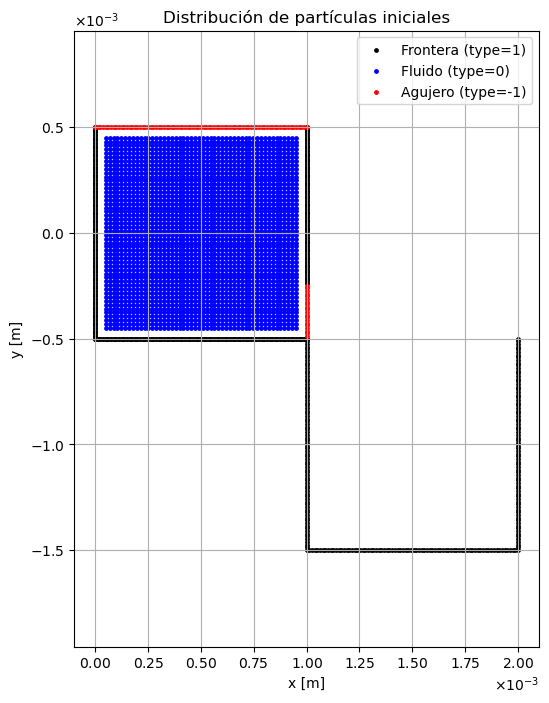

In [1]:
from utils.plot_ics import plot_ics
from pathlib import Path

PROJECT_ROOT = Path("/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH")

ics_vaciado10_50x50 = f"{PROJECT_ROOT}/Output/init_cond/quadtree_verification/vaciado10_50x50.txt"

plot_ics(ics_vaciado10_50x50)

In [2]:
from utils.create_simJSON import create_simulation_config

OUTPUT_50TXT = "Output/init_cond/quadtree_verification/vaciado10_50x50.txt"

create_simulation_config(
    experiment_name="est_c1e-3B0.48_50x50_tree",
    input_file=OUTPUT_50TXT,
    base_json="AndresSimParams.json",
    B = 0.48,
    c = 0.001,
    steps = 6000,
    neighbor_method="quadtree",
    output_tests="Output/vaciado10_50x50_tree",
    project_root=PROJECT_ROOT,
    project_dir=Path(f"{PROJECT_ROOT}/Output")
)

✅ params.json generado: est_c1e-3B0.48_50x50_tree/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/est_c1e-3B0.48_50x50_tree/params.json')

In [3]:
from utils.run_sim import run_single_simulation
from pathlib import Path

PROJECT_ROOT = Path("/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH")

vaciado10_50x50_dir = Path(f"{PROJECT_ROOT}/Output/est_c1e-3B0.48_50x50_tree")

Para analizar el comportamiento es necesario crear un gnuplot que lo grafique hasta el paso 114 que es el punto donde falla.

In [4]:
from utils.create_gnuplot import generar_script_gnuplot

generar_script_gnuplot(
    ruta_archivo_base=f"{vaciado10_50x50_dir}/Output/state_0000.txt",
    lim=114,
    retardo=0.1,
    nombre_salida="plot_c1e-3B0.48_50x50.gp"
)

✅ Script Gnuplot generado correctamente: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/est_c1e-3B0.48_50x50_tree/plot_c1e-3B0.48_50x50.gp
📊 Rangos consecutivos detectados por tipo:
  Tipo 1: líneas 0–220 (221 partículas)
  Tipo -1: líneas 221–321 (101 partículas)
  Tipo 1: líneas 322–779 (458 partículas)
  Tipo 0: líneas 780–3279 (2500 partículas)


Grafiquemos el último valor estable antes de romperse

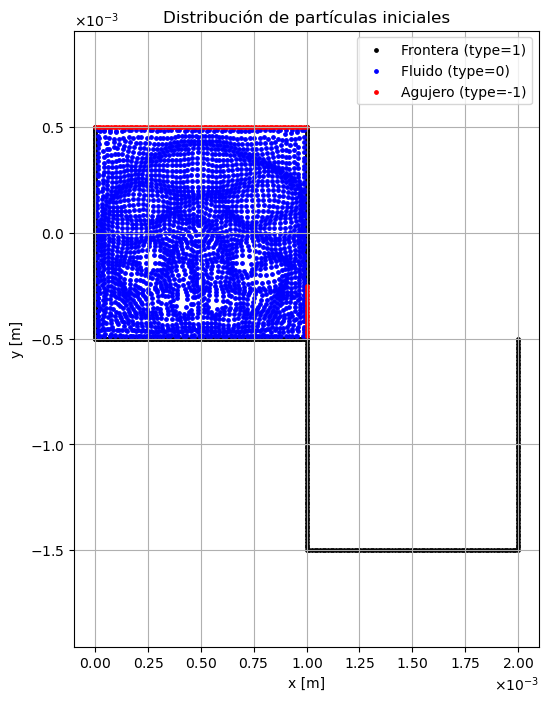

In [5]:
ic1e_3B048_50x50_last_step = f"{vaciado10_50x50_dir}/Output/state_0107.txt"

plot_ics(ic1e_3B048_50x50_last_step)

Esto parece inestabilidad numérica asociada a dos posibles valores, el dt o el c, como ya hicimos un barrrido sobre valores de c, modifiquemos los valores de c.

In [6]:
from utils.create_simJSON import create_simulation_config

OUTPUT_50TXT = "Output/init_cond/quadtree_verification/vaciado10_50x50.txt"

# Cambiamos dt a 5e-6 medio orden menos

create_simulation_config(
    experiment_name="estdt5e-6_c1e-3B0.48_50x50_tree",
    input_file=OUTPUT_50TXT,
    base_json="AndresSimParams.json",
    B = 0.48,
    c = 0.001,
    steps = 6000,
    dt = 5e-6,
    neighbor_method="quadtree",
    output_tests="Output/vaciado10_50x50_tree",
    project_root=PROJECT_ROOT,
    project_dir=Path(f"{PROJECT_ROOT}/Output")
)

✅ params.json generado: estdt5e-6_c1e-3B0.48_50x50_tree/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/estdt5e-6_c1e-3B0.48_50x50_tree/params.json')

In [7]:
PROJECT_ROOT = Path("/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH")

estdt5e_6_50x50_dir = Path(f"{PROJECT_ROOT}/Output/estdt5e-6_c1e-3B0.48_50x50_tree")

In [ ]:
run_single_simulation(
    experiment_dir=estdt5e_6_50x50_dir,
    sim_executable=PROJECT_ROOT / "simulacion",
    timeout_seconds=6300
)

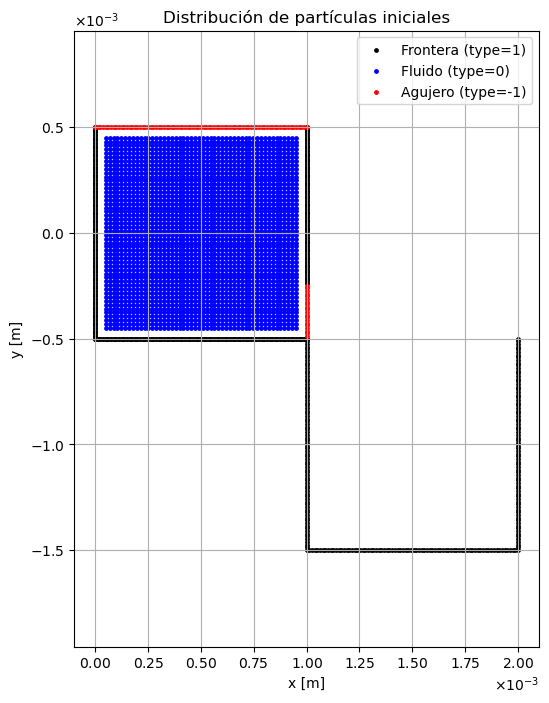

In [8]:
dt1e_6c1e_3B048_50x50 = f"{estdt5e_6_50x50_dir}/Output/state_0000.txt"

plot_ics(dt1e_6c1e_3B048_50x50)

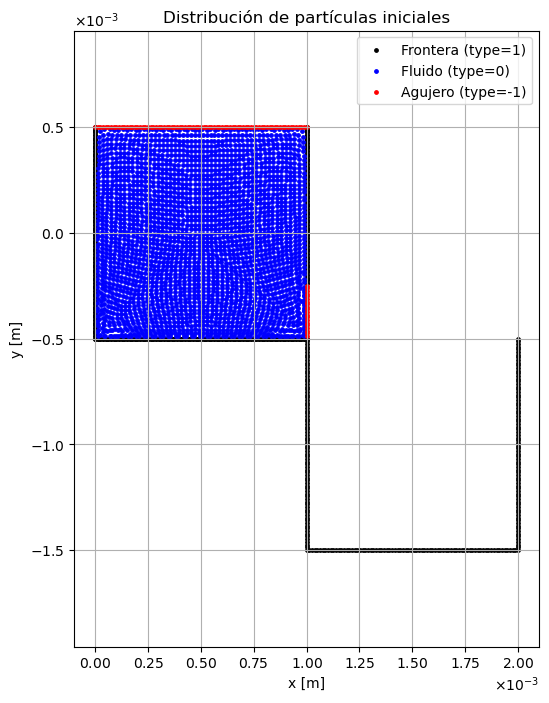

In [9]:
dt1e_6c1e_3B048_50x50 = f"{estdt5e_6_50x50_dir}/Output/state_5000.txt"

plot_ics(dt1e_6c1e_3B048_50x50)

Observemos el comportamiento pero aumentando el valor de presión para contrarrestar la expansión que se ve en la simulación.

In [10]:
OUTPUT_50TXT = "Output/init_cond/quadtree_verification/vaciado10_50x50.txt"

# Cambiamos dt a 5e-6 medio orden menos y B aumeta a 4.8

create_simulation_config(
    experiment_name="estdt5e-6_c1e-3B4.8_50x50_tree",
    input_file=OUTPUT_50TXT,
    base_json="AndresSimParams.json",
    B = 4.8,
    c = 0.001,
    steps = 4000,
    dt = 5e-6,
    neighbor_method="quadtree",
    output_tests="Output/vaciado10_50x50_tree",
    project_root=PROJECT_ROOT,
    project_dir=Path(f"{PROJECT_ROOT}/Output")
)

✅ params.json generado: estdt5e-6_c1e-3B4.8_50x50_tree/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/estdt5e-6_c1e-3B4.8_50x50_tree/params.json')

In [11]:
PROJECT_ROOT = Path("/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH")

estdt5e_6_50x50_dir = Path(f"{PROJECT_ROOT}/Output/estdt5e-6_c1e-3B4.8_50x50_tree")

run_single_simulation(
    experiment_dir=estdt5e_6_50x50_dir,
    sim_executable=PROJECT_ROOT / "simulacion",
    timeout_seconds=6300
)


🚀 Ejecutando simulación: estdt5e-6_c1e-3B4.8_50x50_tree

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/estdt5e-6_c1e-3B4.8_50x50_tree/params.json
[INFO] Configurada EoS Monaghan con parámetros:
       B=4.8, c=0.001, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 3279 pos: (0.00095, 0.00045)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 3280 partículas desde el archivo Output/init_cond/quadtree_verification/vaciado10_50x50.txt

[particleSummary] Número total de partículas: 3280
Fluido: 2500, Ancho: 0.0009, Altura: 0.0009
Frontera: 780, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/vaciado10_50x50_tree/kernel_test.output
[findNeighborsQuadTree] Busc

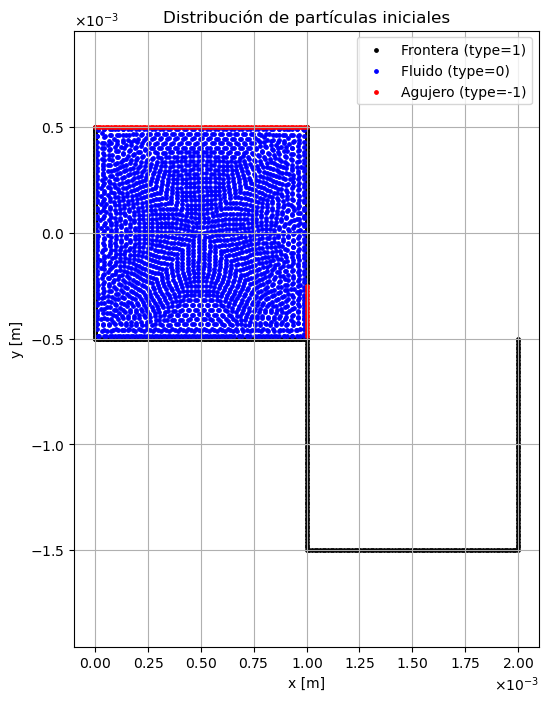

In [18]:
dt1e_6c1e_3B4p8_50x50 = f"{estdt5e_6_50x50_dir}/Output/state_3999.txt"

plot_ics(dt1e_6c1e_3B4p8_50x50)

In [19]:
OUTPUT_50TXT = "Output/init_cond/quadtree_verification/vaciado10_50x50.txt"

# Cambiamos dt a 5e-6 medio orden menos y B aumeta a 4.8

create_simulation_config(
    experiment_name="estdt5e-6_c1e-2B4.8_50x50_tree",
    input_file=OUTPUT_50TXT,
    base_json="AndresSimParams.json",
    B = 4.8,
    c = 0.01,
    steps = 4000,
    dt = 5e-6,
    neighbor_method="quadtree",
    output_tests="Output/vaciado10_50x50_tree",
    project_root=PROJECT_ROOT,
    project_dir=Path(f"{PROJECT_ROOT}/Output")
)

✅ params.json generado: estdt5e-6_c1e-2B4.8_50x50_tree/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/estdt5e-6_c1e-2B4.8_50x50_tree/params.json')

In [ ]:
PROJECT_ROOT = Path("/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH")

estB4p8dt5e_6_50x50_dir = Path(f"{PROJECT_ROOT}/Output/estdt5e-6_c1e-2B4.8_50x50_tree")

run_single_simulation(
    experiment_dir=estdt5e_6_50x50_dir,
    sim_executable=PROJECT_ROOT / "simulacion",
    timeout_seconds=6300
)


🚀 Ejecutando simulación: estdt5e-6_c1e-2B4.8_50x50_tree

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/estdt5e-6_c1e-2B4.8_50x50_tree/params.json
[INFO] Configurada EoS Monaghan con parámetros:
       B=4.8, c=0.01, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 3279 pos: (0.00095, 0.00045)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 3280 partículas desde el archivo Output/init_cond/quadtree_verification/vaciado10_50x50.txt

[particleSummary] Número total de partículas: 3280
Fluido: 2500, Ancho: 0.0009, Altura: 0.0009
Frontera: 780, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/vaciado10_50x50_tree/kernel_test.output
[findNeighborsQuadTree] Busca

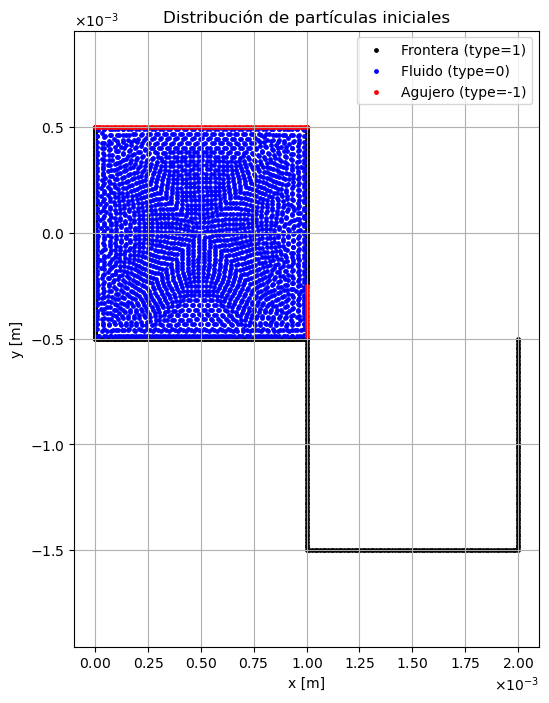

In [22]:
estB4p8dt5e_6_50x50_dir = Path(f"{PROJECT_ROOT}/Output/estdt5e-6_c1e-2B4.8_50x50_tree")

dt1e_6c1e_3B4p8_50x50 = f"{estB4p8dt5e_6_50x50_dir}/Output/state_3999.txt"

plot_ics(dt1e_6c1e_3B4p8_50x50)

In [23]:
OUTPUT_50TXT = "Output/init_cond/quadtree_verification/vaciado10_50x50.txt"

# Cambiamos dt a 5e-6 usamos simulacion mas estable de los parámetros B y c

create_simulation_config(
    experiment_name="estdt5e-6_c1e-4B4e_5_50x50_tree",
    input_file=OUTPUT_50TXT,
    base_json="AndresSimParams.json",
    B = 4e-5,
    c = 1e-4,
    steps = 4000,
    dt = 5e-6,
    neighbor_method="quadtree",
    output_tests="Output/vaciado10_50x50_tree",
    project_root=PROJECT_ROOT,
    project_dir=Path(f"{PROJECT_ROOT}/Output")
)

✅ params.json generado: estdt5e-6_c1e-4B4e_5_50x50_tree/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/estdt5e-6_c1e-4B4e_5_50x50_tree/params.json')

In [28]:
PROJECT_ROOT = Path("/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH")

estdt5e_6B4e_5_c1e_4_50x50_dir = Path(f"{PROJECT_ROOT}/Output/estdt5e-6_c1e-4B4e_5_50x50_tree")
                                                            
run_single_simulation(
    experiment_dir=estdt5e_6B4e_5_c1e_4_50x50_dir,
    sim_executable=PROJECT_ROOT / "simulacion",
    timeout_seconds=6300
)


🚀 Ejecutando simulación: estdt5e-6_c1e-4B4e_5_50x50_tree

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/estdt5e-6_c1e-4B4e_5_50x50_tree/params.json
[INFO] Configurada EoS Monaghan con parámetros:
       B=4e-05, c=0.0001, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 3279 pos: (0.00095, 0.00045)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 3280 partículas desde el archivo Output/init_cond/quadtree_verification/vaciado10_50x50.txt

[particleSummary] Número total de partículas: 3280
Fluido: 2500, Ancho: 0.0009, Altura: 0.0009
Frontera: 780, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/vaciado10_50x50_tree/kernel_test.output
[findNeighborsQuadTree]

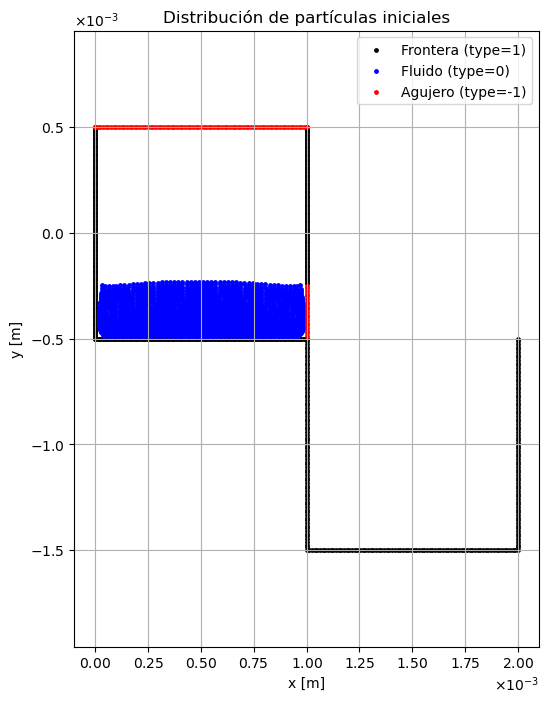

In [29]:
estdt5e_6_c1e_4B4e_5_50x50_dir = Path(f"{PROJECT_ROOT}/Output/estdt5e-6_c1e-4B4e_5_50x50_tree")

dt5e_6B4e_5_c1e_4_50x50 = f"{estdt5e_6_c1e_4B4e_5_50x50_dir}/Output/state_3999.txt"

plot_ics(dt5e_6B4e_5_c1e_4_50x50)